# Machine Learning (Assignment #2) - Luca Pennella Project

# Data description

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

Classify the water quality whether it is potable or not based on the features provided is the main task of this project.

* **pH value:** PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
* **Hardness:** Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
* **Solids (Total dissolved solids - TDS):** Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
* **Chloramines:** Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
* **Sulfate:** ulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
* **Conductivity:** Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
* **Organic_carbon:** Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
* **Trihalomethanes:** THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
* **Turbidity:** The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
* **Potability:** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [1]:
import pandas as pd #to load and manipulate data
import numpy as np
import matplotlib.pyplot as plt #to draw graphs 
import seaborn as sns #to draw graphs 
from sklearn.model_selection import train_test_split #to split data into training and testing sets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix #to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix  #to draw a confusion matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report #to plot score information
from warnings import filterwarnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"C:\Users\lpennella\Desktop/Master/Machine_Learning_Sciandrone/DB/water_potability.csv")

# First Exploration

In [3]:
df.shape

(3276, 10)

We have 3276 instances with the 9 input and 1 output variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We have seen several NaN values and different scales of the features (ph, Sulfate, Trihalomethanes)

In [6]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


We can clearly observe that the features have very different scales. This is largely attributed to the different units in which these features were measured and recorded.
In this case, features scaling can help us resolve this issue.

In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df["Potability"].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

61% of the instances of our target variable is Potable. Instead, 39% of the instances of our target variable is Not Potable.

# Imputation of missing values

It is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. An effective approach to data imputing is to use a model to predict the missing values. A model is created for each feature that has missing values, taking as input values of perhaps all other input featur.
If input variables are numeric, then regression models can be used for prediction, and this case is quite common. A range of different models can be used, although a simple k-nearest neighbor (KNN) model has proven to be effective in experiments. The use of a KNN model to predict or fill missing values is referred to as *Nearest Neighbor Imputation* or *KNN imputation*.

In [9]:
from sklearn.impute import KNNImputer

In [10]:
imputer =  KNNImputer(n_neighbors=2, weights="uniform")
df_no_missing = imputer.fit_transform(df)
df_no_missing = pd.DataFrame(df_no_missing)
df_no_missing.columns = ["ph"
                        ,"Hardness"
                        ,"Solids"
                        ,"Chloramines"
                        ,"Sulfate"
                        ,"Conductivity"
                        ,"Organic_carbon"
                        ,"Trihalomethanes"
                        ,"Turbidity"
                        ,"Potability"]
df_no_missing

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.007427,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,326.479827,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,357.947334,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,355.544770,392.449580,19.903225,46.827049,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,321.930158,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,338.733772,402.883113,11.168946,77.488213,4.708658,1.0


# Exploratory Data Analysis

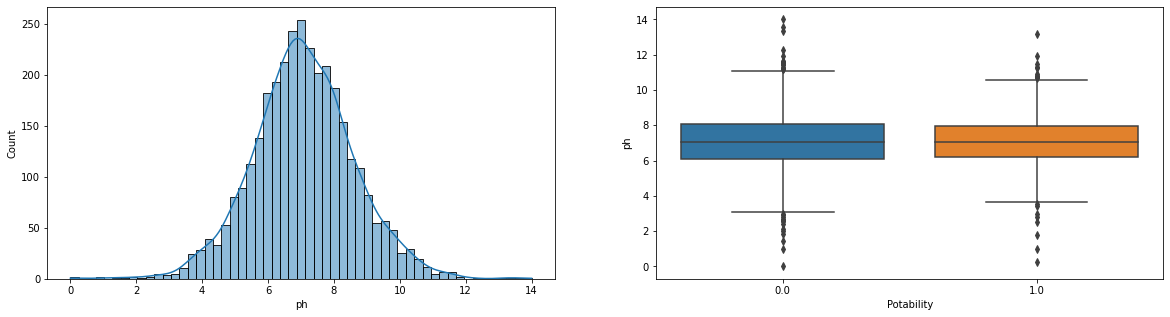

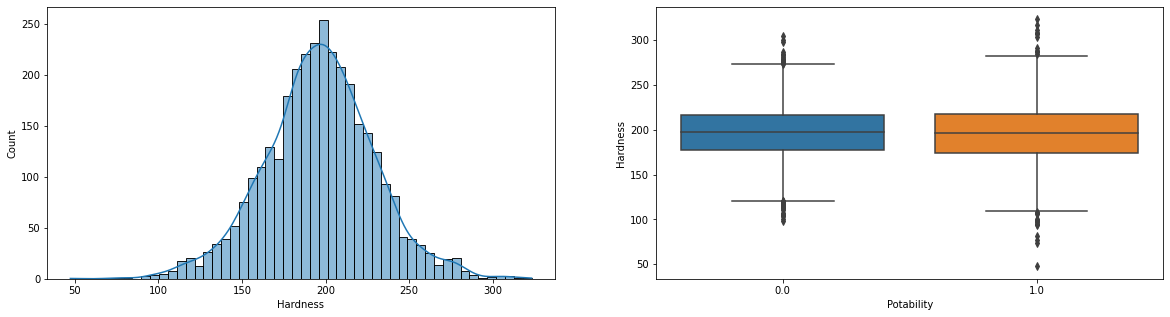

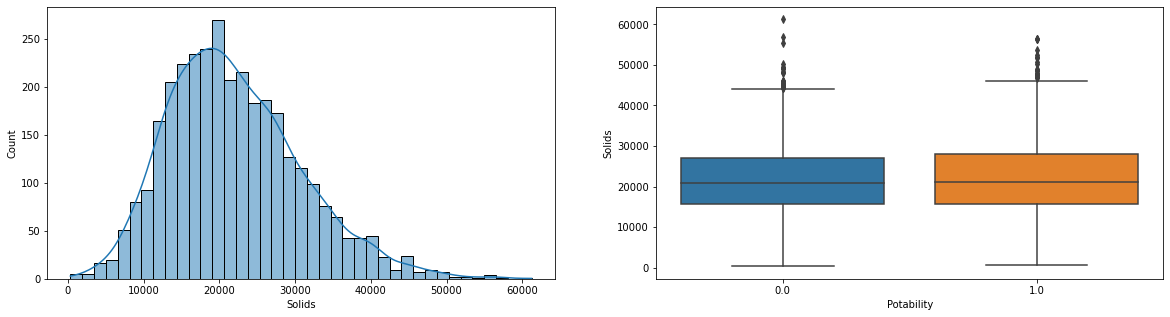

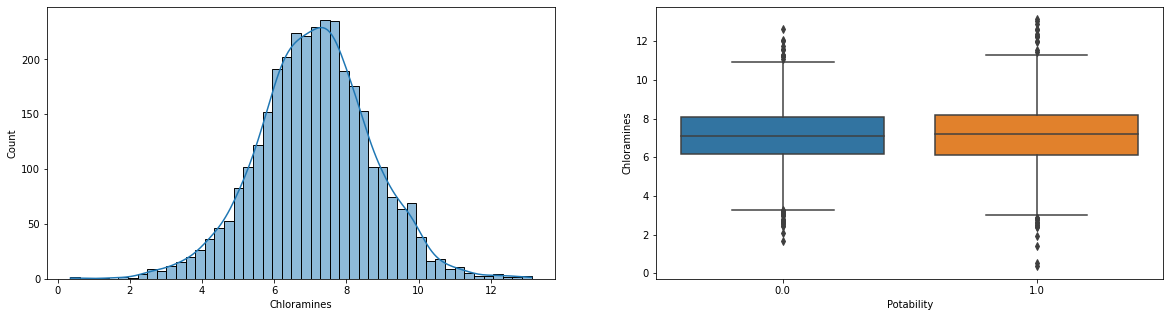

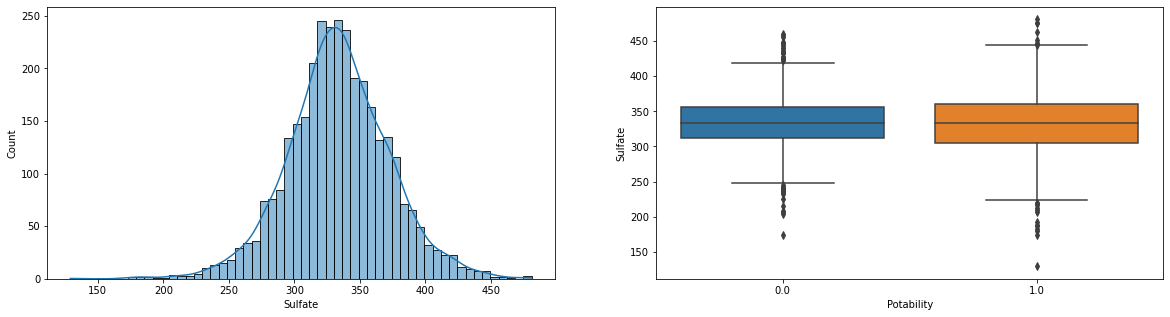

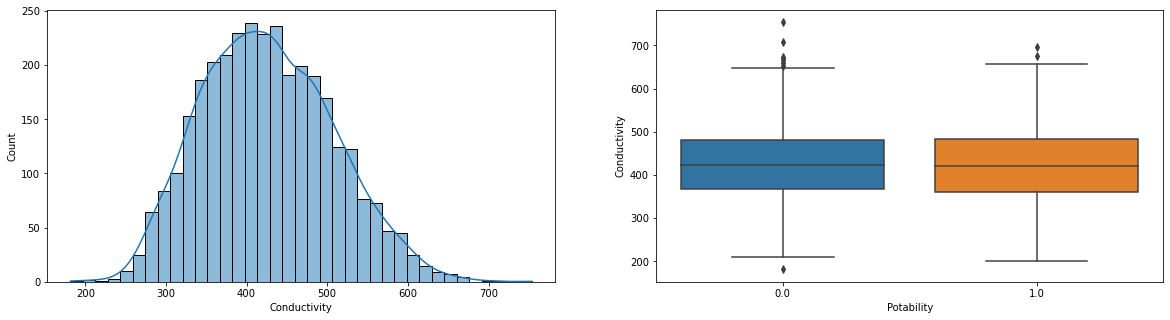

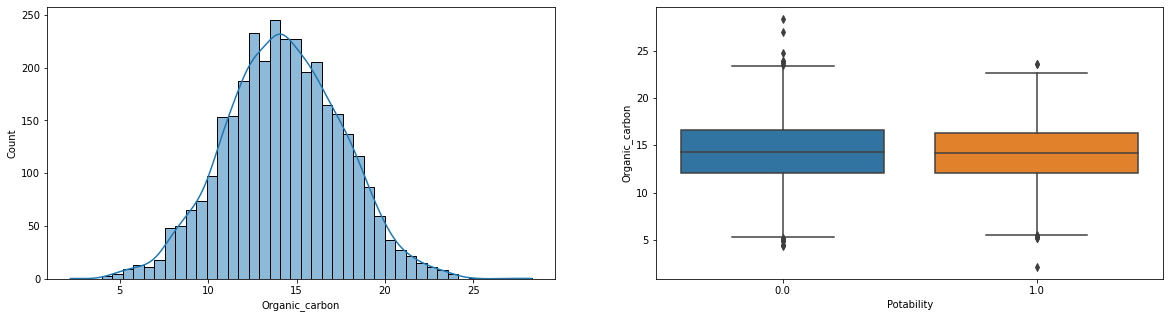

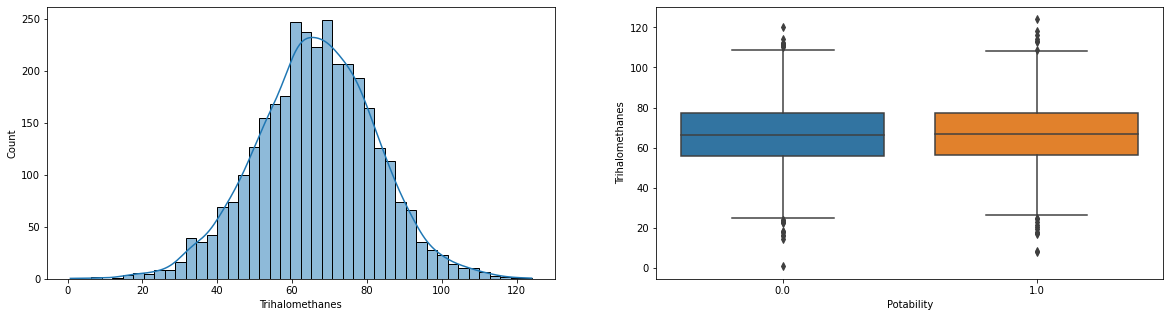

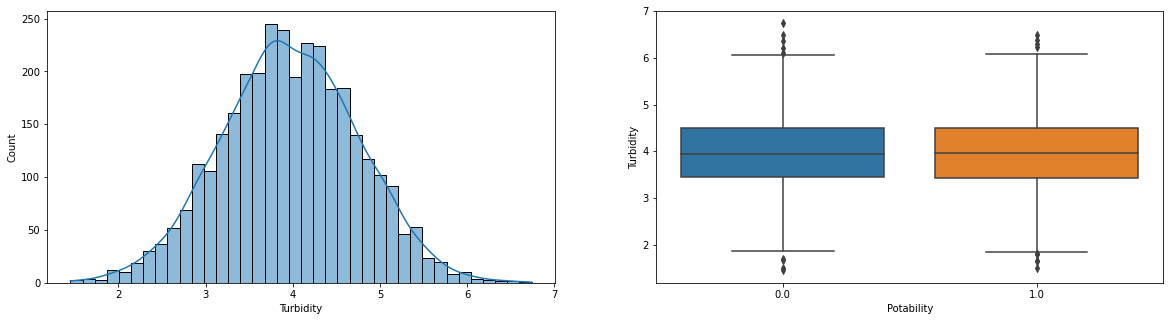

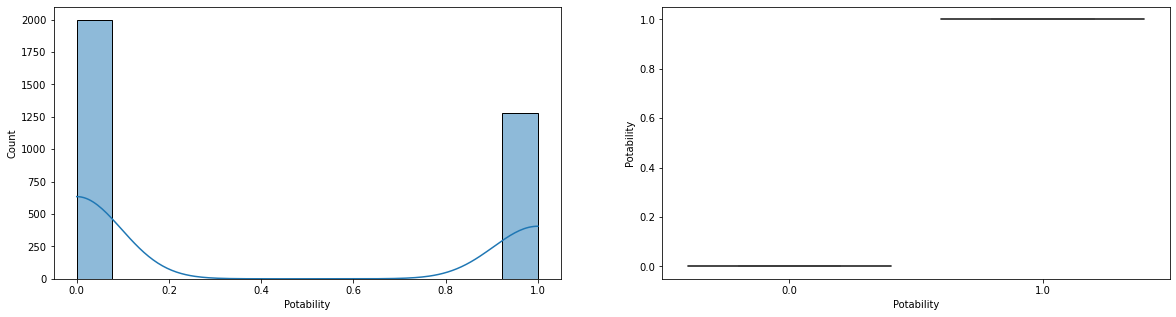

In [11]:
num_cols = df_no_missing.select_dtypes(['float64'])

for col in num_cols:
    f, axis = plt.subplots(1,2, figsize=(20, 5))
    sns.histplot(x=df_no_missing[col], ax=axis[0], kde=True)
    sns.boxplot(x=df_no_missing['Potability'], y=df_no_missing[col], ax=axis[1])
    plt.show()

Our features have very close to normal distribution.
*Solids* have slightly right skewness..

As we can see, little or no marginal correlation between the target variable and the other features.

# Feature Scaling

Unscaled data can adversely impact a model’s ability to make accurate predictions. 
Feature scaling does not always result in an improvement in model performance. There are some machine learning models that do not require feature scaling.
In this analysis, however, we want to use the Support Vector Machine as a Machine Learning (SVM) model.
A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.
SVMs are sensitive to the feature scales, as you can see in *Figure* below on the left plot, the vertical scale is much larger than the orizontal scale, so the widest possible street is close to horizontal. After feature scaling (e.g., using Scikit-Learn’s StandardScaler), the decision boundary looks much better (on the right plot).

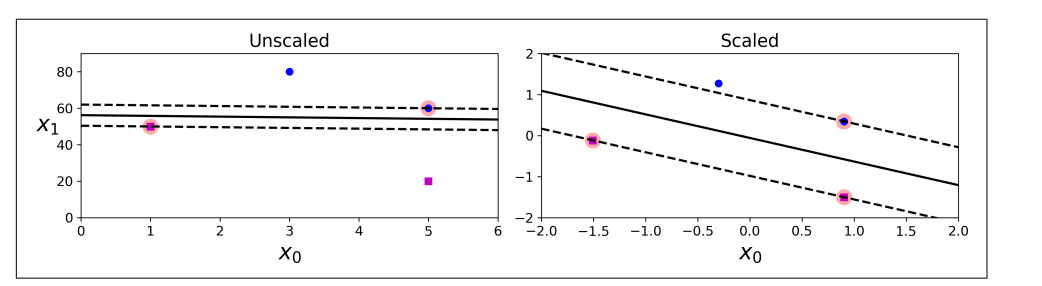

— *Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow*, 2019.

The underlying algorithms to distance-based models make them the most vulnerable to unscaled data.
Algorithms like k-nearest neighbours, support vector machines and k-means clustering use the distance between data points to determine their similarity. Hence, features with a greater magnitude will be assigned a higher weightage by the model. This is not an ideal scenario as we do not want our model to be heavily biased towards a single feature.
Evidently, it is crucial that we implement feature scaling to our data before fitting them to distance-based algorithms to ensure that all features contribute equally to the result of the predictions.

In [12]:
X = df_no_missing.drop('Potability', axis = 1).copy() #The Pandas drop() function in Python is used to drop specified labels from rows and columns
X.head() 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.007427,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,326.479827,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,357.947334,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [13]:
y = df_no_missing['Potability'].copy()
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Potability, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The recommended way to use feature scaling (see 'Elements of Statistical Learning', chapter 'The Wrong and Right Way to Do Cross-validation') is to calculate the mean and the standard deviation of the values in the training set and then apply them for standardizing both the training and testing sets.
The idea behind this is to prevent data leakage from the testing to the training set because the aim of model validation is to subject the testing data to the same conditions as the data used for the model training.

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Evaluation of different SVMs

The idea is to make a first evaluation of several SVMs and then to implement Hyperparameter Tuning on the best one.

In [16]:
filterwarnings('ignore')
models = [("linear_svc", LinearSVC(C=1, loss="hinge")), 
          ("gaussian_svc", SVC(kernel='rbf', random_state=0, gamma=1, C=0.5)),
         ("polynomial_svc", SVC(kernel='poly', degree=3, coef0=1, C=0.5))
         ]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results, average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [17]:
finalResults

[('gaussian_svc', 0.8145038167938932),
 ('polynomial_svc', 0.6529200359389038),
 ('linear_svc', 0.31402439024390244)]

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. 
This is one of those cases, as we can see nonlinear kernels work better. Especially the gaussian kernel always provide the best results.

# Fine-Tuning the models

Models can have many hyper-parameters and finding the best combination of parameters can be treated as a search problem. SVM also has some hyper-parameters (like what C or gamma values to use) and finding optimal hyper-parameter is a very hard task to solve. But it can be found by just trying all combinations and see what parameters work best. The main idea behind it is to create a grid of hyper-parameters and just try all of their combinations, this method is called **Gridsearch**.

In [18]:
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

* **C parameter:** It is a hypermeter in SVM to control error. It acts as a penalty parameter, a small value of C will result in a larger margin separating the hyperplane. If we don’t want our training points to be misclassified, then we go for a large value of C, which will result in a smaller margin separating plane, but it can lead to an overfitting problem where the model may not generalize well on training data.
* **Gamma parameter:** This will decide the curvature of the decision boundary, higher the gamma, the greater is the curvature of the decision boundary.

In [19]:
gsRbf = GridSearchCV(SVC(),
                     param_grid = param_grid,
                     scoring='accuracy',
                     cv=4,
                     refit=True,
                     n_jobs=1)

In [20]:
# Train the SVM classifier
gsRbf.fit(X_train, y_train)

# Print the model parameters of the best model
print(gsRbf.best_params_)

# Print the model score on the test data using GridSearchCV score method
print('Test accuracy: %.3f' % gsRbf.score(X_test, y_test))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test accuracy: 0.680


We can see that the values of C=1, gamma= 0.1 produced the best results with an accuracy of 68.00%

In [21]:
param_grid_poly = {'degree': [3, 4,5],
              'C': [1, 0.1, 0.05],
              'kernel': ['poly']}

In [22]:
gsPoly = GridSearchCV(SVC(),
                     param_grid = param_grid_poly,
                     scoring='accuracy',
                     cv=2,
                     refit=True,
                     n_jobs=1)

In [23]:
# Train the SVM classifier
gsPoly.fit(X_train, y_train)

# Print the model parameters of the best model
print(gsPoly.best_params_)

# Print the model score on the test data using GridSearchCV score method
print('Test accuracy: %.3f' % gsPoly.score(X_test, y_test))

{'C': 1, 'degree': 4, 'kernel': 'poly'}
Test accuracy: 0.651


From the comparison of the two models the best seems to be Gaussian RBF Kernel.

In [24]:
print(gsRbf.best_estimator_)

SVC(C=1, gamma=0.1)


# Final Model

In [25]:
rfb_model = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1)
rfb_model = rfb_model.fit(X_train, y_train)
pred = model.predict(X_test)


In [26]:
print(f'train accuracy: {accuracy_score(y_train,rfb_model.predict(X_train))}')
print(f'test accuracy:  {accuracy_score(y_test,rfb_model.predict(X_test))}')
print(classification_report(y_test, pred))

train accuracy: 0.7202290076335878
test accuracy:  0.6798780487804879
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.77       412
         1.0       0.62      0.32      0.42       244

    accuracy                           0.67       656
   macro avg       0.65      0.60      0.60       656
weighted avg       0.66      0.67      0.64       656



As can be seen from the results we managed to achieve an accuracy of 68% on the test-set. However, the recall index for the "Potability" class is what worries me the most, as a bad classification leads to the definition of drinking water as non-potable.

This result is not unexpected as the features we do not possess do not seem to be very correlated with the target variable.
A possible solution to try to improve the results could be to use another algorithm, such as a Random Forest.

# Try Random Forest

              precision    recall  f1-score   support

         0.0       0.70      0.89      0.78       412
         1.0       0.64      0.35      0.45       244

    accuracy                           0.69       656
   macro avg       0.67      0.62      0.62       656
weighted avg       0.68      0.69      0.66       656

0.6859756097560976


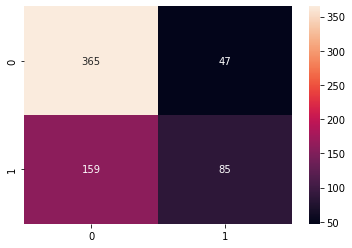

In [27]:
Rfc = RandomForestClassifier()
Rfc.fit(X_train, y_train)

y_Rfc = Rfc.predict(X_test)
print(classification_report(y_test, y_Rfc))
print(accuracy_score(y_test, y_Rfc))
sns.heatmap(confusion_matrix(y_test, y_Rfc), annot=True, fmt='d')
plt.show()

Random forest doesn't seem to perform better.

# Explainable Machine Learning with SHAP

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions

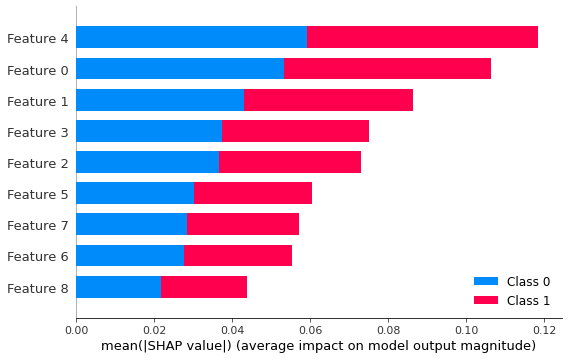

In [28]:
import shap
shap_values = shap.TreeExplainer(Rfc).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

* **Feature 0:** ph
* **Feature 1:** Hardness
* **Feature 2:** Solids
* **Feature 3:** Chloramines
* **Feature 4:** Sulfate
* **Feature 5:** Conductivity
* **Feature 6:** Organic_carbon
* **Feature 7:** Trihalomethanes
* **Feature 8:** Turbidity
* **Feature 9:** Potability

The chart with the shap values shows two effects:
* No particular feature seems to particularly affect the potability of the water.
* The most relevant features in the prediction seem to be the *ph* and the *Sulfate*.

# Conclusion

The features in our possession do not seem to be significant enough to efficiently explain the potability of water.
However, through fine tuning and model selection we were able to select an SVM model with sufficient performance (68% accuracy).
This project proved to be very useful for investigating issues related to the SVM kernel, for fine-tuning hyperparameters, for imputing missing data and for better studying some machine learning libraries.

#
# Another Project

# Data description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

* **Surname:** The surname of the customer
* **CreditScore:** The credit score of the customer
* **Geography:** The country of the customer(Germany/France/Spain)
* **Gender:** The gender of the customer (Female/Male)
* **Age:** The age of the customer
* **Tenure:** The customer's number of years in the in the bank
* **Balance:** The customer's account balance
* **NumOfProducts:** The number of bank products that the customer uses
* **HasCrCard:** Does the customer has a card? (0=No,1=Yes)
* **IsActiveMember:** Does the customer has an active mebership (0=No,1=Yes)
* **EstimatedSalary:** The estimated salary of the customer
* **Exited:** Churned or not? (0=No,1=Yes)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [33]:
df = pd.read_csv(r"C:\Users\lpennella/Desktop/Master/Machine_Learning_Sciandrone/DB_1/Churn_Modelling.csv")

# First Exploration

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
print('N. of rows: {}'.format(df.shape[0]))
print('N. of columns: {}'.format(df.shape[1]))

N. of rows: 10000
N. of columns: 14


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [37]:
new_df = df.drop(df.columns[np.array([0,1,2])], axis=1)
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
new_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [39]:
cat_cols = new_df.select_dtypes('object')
for i in cat_cols:
    d = new_df[i].value_counts()
    print(d)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [40]:
new_df['Balance'] = new_df['Balance'].apply(np.int64)
new_df['EstimatedSalary'] = new_df['EstimatedSalary'].apply(np.int64)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CreditScore      10000 non-null  int64 
 1   Geography        10000 non-null  object
 2   Gender           10000 non-null  object
 3   Age              10000 non-null  int64 
 4   Tenure           10000 non-null  int64 
 5   Balance          10000 non-null  int64 
 6   NumOfProducts    10000 non-null  int64 
 7   HasCrCard        10000 non-null  int64 
 8   IsActiveMember   10000 non-null  int64 
 9   EstimatedSalary  10000 non-null  int64 
 10  Exited           10000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 859.5+ KB


In [41]:
new_df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

# Exploratory Data Analysis

In [42]:
num_cols = new_df.select_dtypes(['int64'])

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64


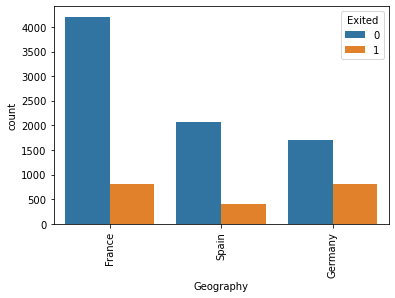

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64


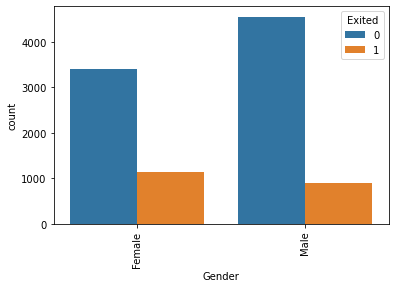

In [43]:
for col in cat_cols:
    print(new_df.groupby([col,'Exited'])['Exited'].count())
    sns.countplot(x=new_df[col], hue=new_df['Exited'])
    plt.xticks(rotation=90)
    plt.show()

**Geography**
* French customers are the largest class.
* In percentage, German customers are the most churned customers.

**Gender**
* Male customera are the largest class.
* In percentage, Female customers are the most churned customers.

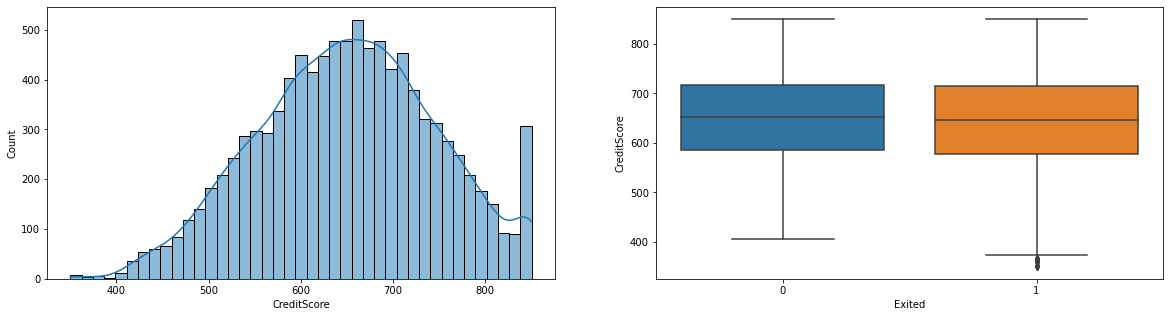

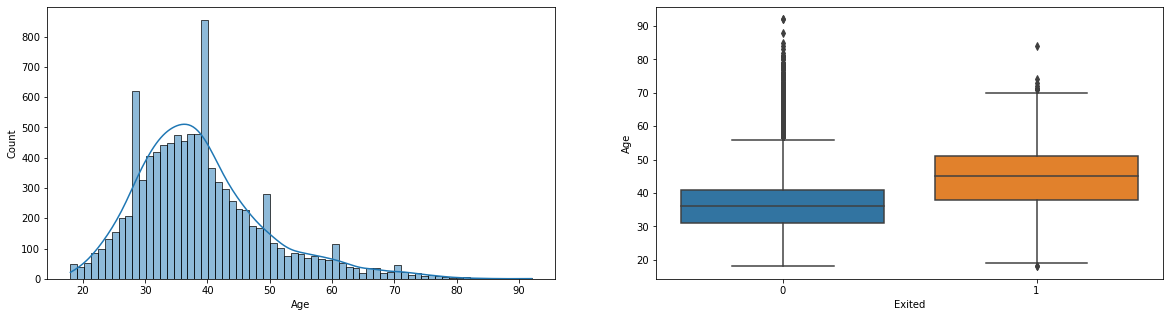

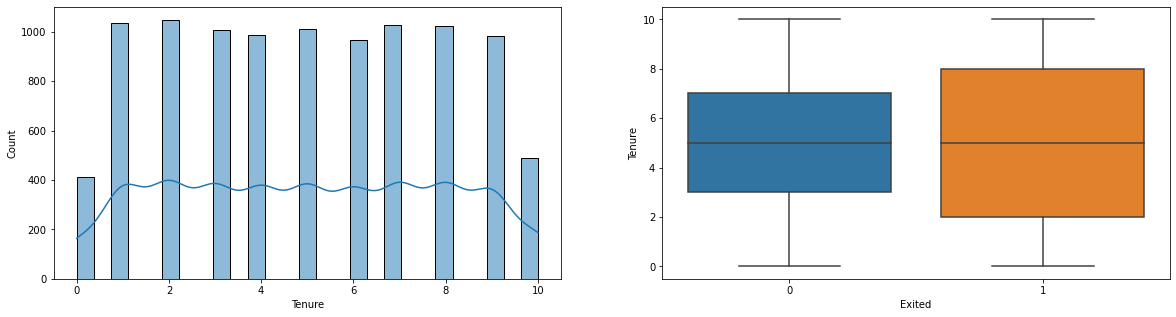

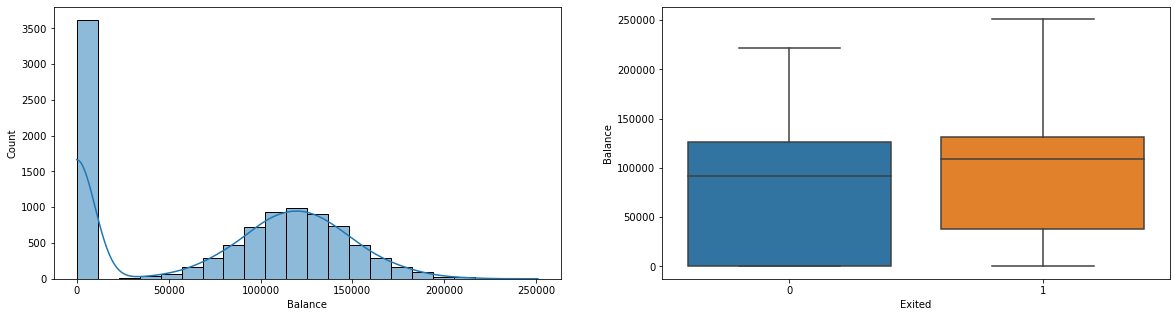

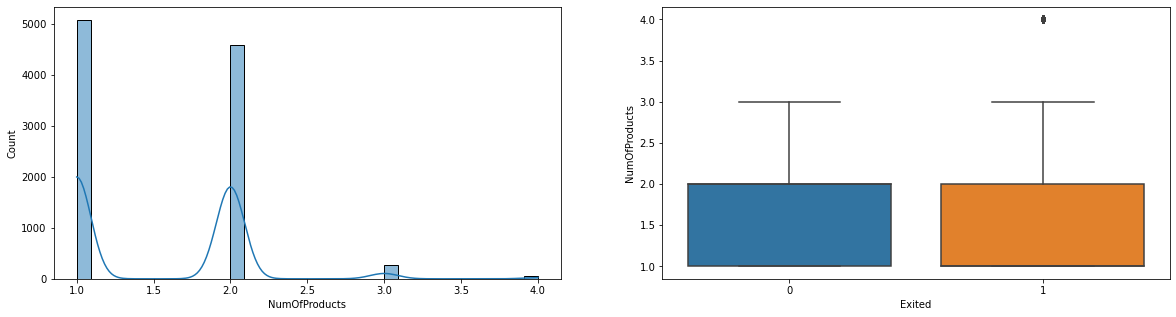

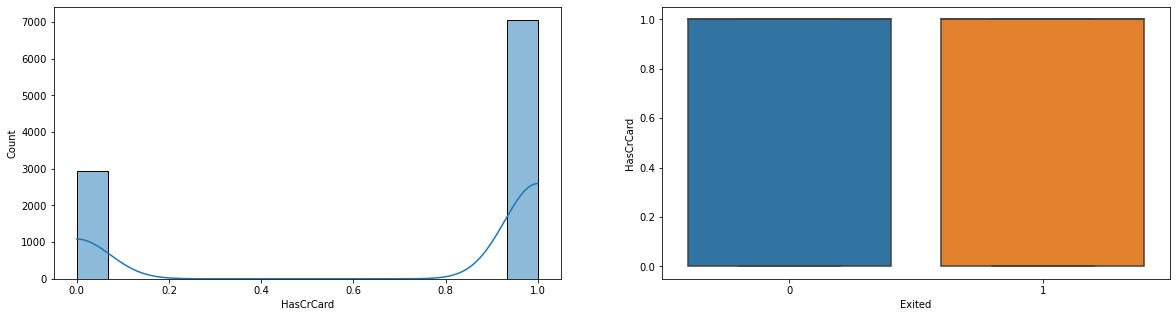

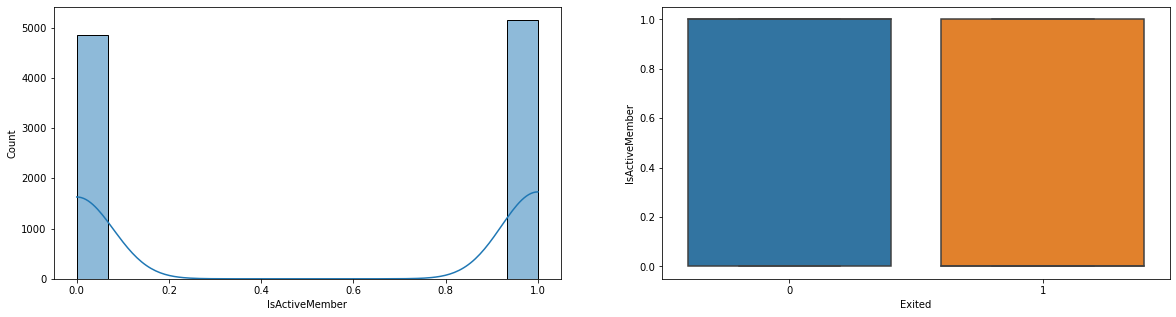

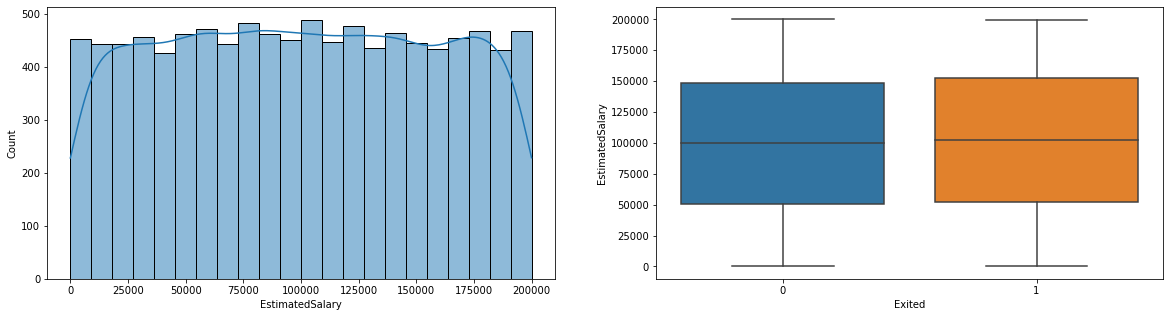

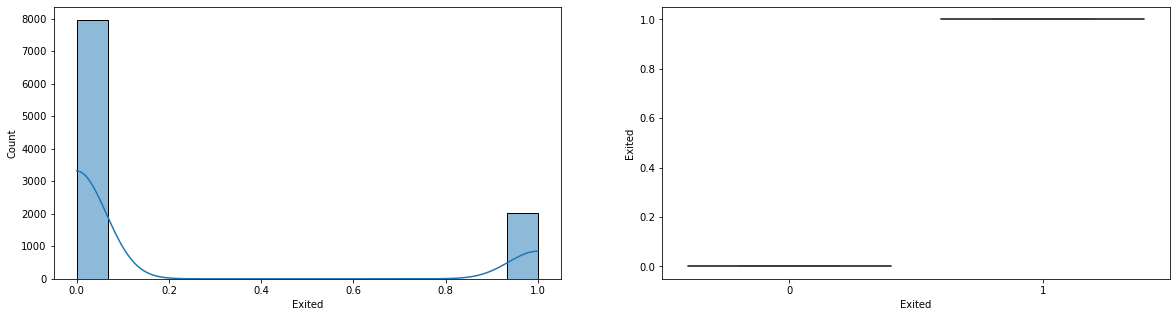

In [44]:
for col in num_cols:
    f, axis = plt.subplots(1,2, figsize=(20, 5))
    sns.histplot(x=new_df[col], ax=axis[0], kde=True)
    sns.boxplot(x=new_df['Exited'], y=new_df[col], ax=axis[1])
    plt.show()

**Credit Score**
* *Credit Score* attribute is not symmetric.
*  Looking at the boxplots, it is not possible to see hypothetical relation with target features.

**Age**
* *Age* attribute is not symmetric, we have a positive skew.
*  Minimum and Maximum age of the people is 18 and 92 respectively.
*  Looking at the boxplots, it is possible to see that in proportion as age increases, the probability of churn increase.

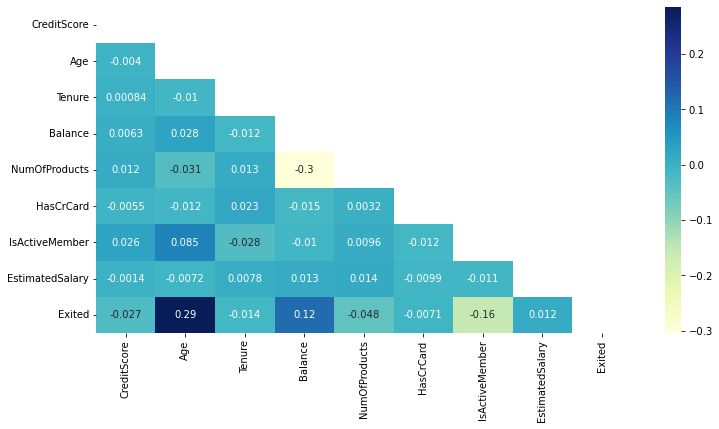

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
matrix = np.triu(new_df.corr())
corr = new_df.corr()
corr_matrix = sns.heatmap(corr, annot=True, cmap="YlGnBu", mask = matrix)

There aren't many features with marginal correlation with target features.
As seen above, *Age* is the variable with the biggest correlation with the *y*.
You can see a slight (positive) correlation of *Balance* and (negative) *IsActiveMember* with the *y*.

# Try new Variables

In [46]:
df_try = new_df.copy()
df_try["Wealth"] = df_try["Balance"]+df_try["EstimatedSalary"]
df_try["BalanceForProduct"] = df_try["Balance"]/df_try["NumOfProducts"]
df_try["Age*Balance"] = df_try["Age"]*df_try["Balance"]
corr_matrix = df_try.corr()
corr_matrix["Exited"].sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Age*Balance          0.205775
Balance              0.118533
BalanceForProduct    0.109806
Wealth               0.094755
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
IsActiveMember      -0.156128
Name: Exited, dtype: float64

In [47]:
new_df["Age*Balance"] = new_df["Age"]*new_df["Balance"]

In [48]:
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age*Balance
0,619,France,Female,42,2,0,1,1,1,101348,1,0
1,608,Spain,Female,41,1,83807,1,0,1,112542,0,3436087
2,502,France,Female,42,8,159660,3,1,0,113931,1,6705720
3,699,France,Female,39,1,0,2,0,0,93826,0,0
4,850,Spain,Female,43,2,125510,1,1,1,79084,0,5396930


# Split in X and y sets

In [49]:
X = new_df.drop('Exited', axis = 1).copy() 
X.head() 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age*Balance
0,619,France,Female,42,2,0,1,1,1,101348,0
1,608,Spain,Female,41,1,83807,1,0,1,112542,3436087
2,502,France,Female,42,8,159660,3,1,0,113931,6705720
3,699,France,Female,39,1,0,2,0,0,93826,0
4,850,Spain,Female,43,2,125510,1,1,1,79084,5396930


In [50]:
y = new_df['Exited'].copy()
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Encoding Categorical Features

In [51]:
X_encoded = pd.get_dummies(X, columns= ['Geography',
                                        'Gender'])
X_encoded = X_encoded.drop('Gender_Female', axis = 1).copy() 
X_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age*Balance,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,1,0,0,0
1,608,41,1,83807,1,0,1,112542,3436087,0,0,1,0
2,502,42,8,159660,3,1,0,113931,6705720,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,0
4,850,43,2,125510,1,1,1,79084,5396930,0,0,1,0


# Feature Scaling & split in train and test set

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [53]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [54]:
print(y_train.value_counts() / len(y_train))
print(y_test.value_counts() / len(y_test))

0    0.7945
1    0.2055
Name: Exited, dtype: float64
0    0.8035
1    0.1965
Name: Exited, dtype: float64


In [55]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Evaluation of different Models

The idea is to make an initial evaluation of several models and select the best ones.

In [56]:
filterwarnings('ignore')
models = [("linear_svc", LinearSVC(C=1, loss="hinge")), 
          ("gaussian_svc", SVC(kernel='rbf', random_state=0, gamma=1, C=0.5)),
          ("polynomial_svc", SVC(kernel='poly', degree=3, coef0=1, C=0.5)),
          ("RFC", RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, n_jobs=-1)),
           ("BC", BaggingClassifier(
            DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
             n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1)) 
         ]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results, average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [57]:
finalResults

[('BC', 0.8384577768733352),
 ('RFC', 0.8297371642442065),
 ('polynomial_svc', 0.8186111111111112),
 ('gaussian_svc', 0.7987902057374674),
 ('linear_svc', 0.40175)]

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. 
This is one of those cases, as we can see nonlinear kernels work better. 
Random Forest and Bagging Classifier have a better performance than SVCs.

In [58]:
param_grid_SVC = {'C': [0.5, 1, 5],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

In [59]:
gsRbf = GridSearchCV(SVC(),
                     param_grid = param_grid_SVC,
                     scoring='accuracy',
                     cv=5,
                     refit=True,
                     n_jobs=1)

In [60]:
# Train the SVM classifier
gsRbf.fit(X_train, y_train)

# Print the model parameters of the best model
print(gsRbf.best_params_)

# Print the model score on the test data using GridSearchCV score method
print('Test accuracy: %.3f' % gsRbf.score(X_test, y_test))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test accuracy: 0.860


In [61]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [True], 'n_estimators': [100, 150, 200], 'max_features': [2, 3, 4]},
  ]

forest_class = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [True], 'max_features': [2, 3, 4],
                          'n_estimators': [100, 150, 200]}],
             return_train_score=True, scoring='accuracy')

In [62]:
print(grid_search.best_params_)
print('Test accuracy: %.3f' % grid_search.score(X_test, y_test))

{'bootstrap': True, 'max_features': 2, 'n_estimators': 200}
Test accuracy: 0.867


# Evaluation metrics

In [63]:
SVC_model = SVC(kernel='rbf', random_state=42, gamma=0.1, C=1)
RFC_model = RandomForestClassifier(random_state=42, n_estimators=200, max_features = 2, max_leaf_nodes=16)

0.8595
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.41      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



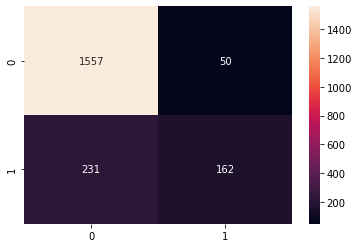

In [64]:
SVC_model = SVC_model.fit(X_train, y_train)
pred_SVC = SVC_model.predict(X_test)
print(accuracy_score(y_test, pred_SVC))
print(classification_report(y_test, pred_SVC))
sns.heatmap(confusion_matrix(y_test, pred_SVC), annot=True, fmt='d')
plt.show()

0.838
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1607
           1       0.86      0.21      0.34       393

    accuracy                           0.84      2000
   macro avg       0.85      0.60      0.62      2000
weighted avg       0.84      0.84      0.80      2000



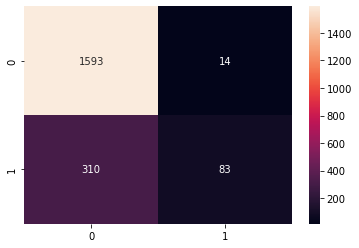

In [65]:
RFC_model = RFC_model.fit(X_train, y_train)
pred_RFC = RFC_model.predict(X_test)
print(accuracy_score(y_test, pred_RFC))
print(classification_report(y_test, pred_RFC))
sns.heatmap(confusion_matrix(y_test, pred_RFC), annot=True, fmt='d')
plt.show()

It is possible to notice how the SVC performs better, however, observing the Recall index for classes 1 the performance is not good.
To try to improve performance we will proceed with the balancing of the dataset.

# SMOTE for Imbalanced Classification

A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

In [66]:
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

Length of X (train): 8000 | Length of y (train): 8000
Length of X (test): 2000 | Length of y (test): 2000


In [67]:
smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(X_train, y_train)
print('Length of X (resample): {} | Length of y (resample): {}'.format(len(X_res), len(y_res)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

Length of X (resample): 12712 | Length of y (resample): 12712
Length of X (test): 2000 | Length of y (test): 2000


0.7865
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1607
           1       0.47      0.71      0.57       393

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.83      0.79      0.80      2000



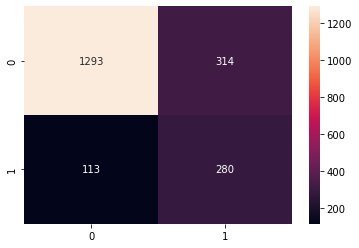

In [68]:
SVC_model = SVC_model.fit(X_res, y_res)
pred_SVC_im = SVC_model.predict(X_test)
print(accuracy_score(y_test, pred_SVC_im))
print(classification_report(y_test, pred_SVC_im))
sns.heatmap(confusion_matrix(y_test, pred_SVC_im), annot=True, fmt='d')
plt.show()

0.7895
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1607
           1       0.48      0.74      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



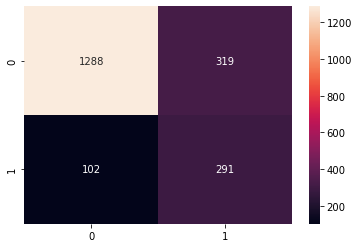

In [69]:
RFC_model = RFC_model.fit(X_res, y_res)
pred_RFC_im = RFC_model.predict(X_test)
print(accuracy_score(y_test, pred_RFC_im))
print(classification_report(y_test, pred_RFC_im))
sns.heatmap(confusion_matrix(y_test, pred_RFC_im), annot=True, fmt='d')
plt.show()

The rebalancing improved the classification of class 1.
In my opinion, given the nature of the problem, this solution is preferable even if it has a lower accuracy because I can better identify customers at risk of churn.

The model that seems to perform best in identifying customers at risk of churn is the Random Forest.

# Explainable Machine Learning with SHAP

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions

In [70]:
col = X_encoded.columns.values.tolist()
col

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Age*Balance',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

In [71]:
X_res_ex = pd.DataFrame(X_res, columns= col)
X_res_ex.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age*Balance,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,0.356500,-0.655786,0.345680,-1.218470,0.808436,0.649203,0.974817,1.367674,-1.126435,1.001501,-0.579467,-0.576388,0.913248
1,-0.203898,0.294938,-0.348369,0.696836,0.808436,0.649203,0.974817,1.661248,0.773701,-0.998501,1.725723,-0.576388,0.913248
2,-0.961472,-1.416365,-0.695393,0.618622,-0.916688,0.649203,-1.025834,-0.252799,-0.084983,-0.998501,-0.579467,1.734942,0.913248
3,-0.940717,-1.131148,1.386753,0.953220,-0.916688,0.649203,-1.025834,0.915394,0.258595,1.001501,-0.579467,-0.576388,-1.094993
4,-1.397337,1.625953,1.386753,1.057452,-0.916688,-1.540351,-1.025834,-1.059592,1.884095,1.001501,-0.579467,-0.576388,0.913248


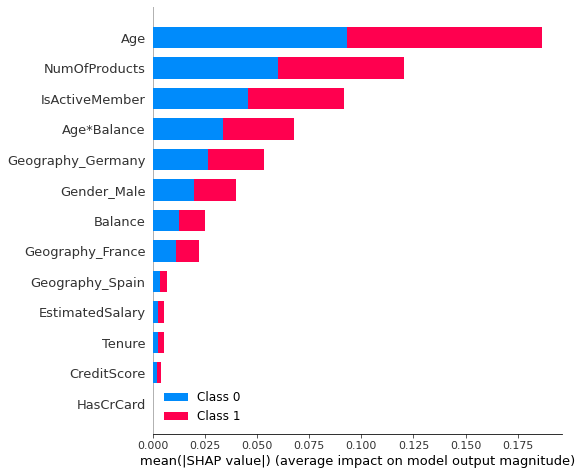

In [72]:
shap_values = shap.TreeExplainer(RFC_model).shap_values(X_res_ex)
shap.summary_plot(shap_values, X_res_ex, plot_type="bar")

In [73]:
X_test_ex = pd.DataFrame(X_test, columns= col)
X_test_ex.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age*Balance,Geography_France,Geography_Germany,Geography_Spain,Gender_Male
0,-0.577496,-0.655786,-0.695393,0.329942,0.808436,-1.540351,-1.025834,-1.019603,0.043964,-0.998501,1.725723,-0.576388,0.913248
1,-0.297297,0.390011,-1.389442,-1.218470,0.808436,0.649203,0.974817,0.798886,-1.126435,1.001501,-0.579467,-0.576388,0.913248
2,-0.525607,0.485083,-0.348369,-1.218470,0.808436,0.649203,-1.025834,-0.727976,-1.126435,-0.998501,-0.579467,1.734942,-1.094993
3,-1.511492,1.911170,1.039728,0.689278,0.808436,0.649203,0.974817,1.221382,1.532272,-0.998501,1.725723,-0.576388,0.913248
4,-0.951094,-1.131148,0.692704,0.782831,-0.916688,0.649203,0.974817,0.247555,0.149926,-0.998501,-0.579467,1.734942,-1.094993


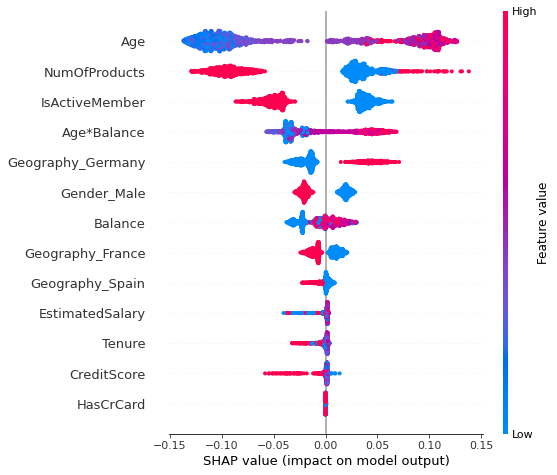

In [74]:
explainer_k = shap.TreeExplainer(RFC_model)

shap_values_k = explainer_k.shap_values(X_test_ex)

shap.summary_plot(shap_values_k[1], X_test_ex)

In [75]:
row_to_show = 5
data_for_prediction = X_test_ex.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

In [76]:
RFC_model.predict_proba(data_for_prediction_array)

array([[0.79921226, 0.20078774]])

In [77]:
shap_values = explainer_k.shap_values(data_for_prediction)

In [78]:
shap.initjs()
shap.force_plot(explainer_k.expected_value[1], shap_values[1], data_for_prediction)